<a href="https://colab.research.google.com/github/MauryaDave/Food-and-Beverage-Packaging-Consumer-Insights/blob/main/F%26B_Survey_Data_27Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=9d9c26b6aab382a60d3b1afec0e56a2d9124b2f93772dd6f4f04d6723eba506a
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
# import Python packages
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

# regression package
import statsmodels.api as sm

# factor analysis packages
import factor_analyzer
# you could also use sklearn to run PCA

# clustering packages
from sklearn import cluster
from sklearn.cluster import KMeans
# k_means() is a wrapper that returns the result of KMeans.fit()
from yellowbrick.cluster import KElbowVisualizer

# Data Loading and Transformation



In [ ]:
# Dataset file upload
uploaded_1 = files.upload()
survey_data = pd.read_excel('Survey_Data.xlsx')

Saving Survey_Data.xlsx to Survey_Data.xlsx


In [ ]:
print(survey_data.iloc[:, :25])

             ID        Time Started       Time Finished Manufacturer       OS  \
0    1691057265 2024-04-30 13:15:00 2024-04-30 13:19:00      Unknown      iOS   
1    1505422888 2024-04-30 13:28:00 2024-04-30 13:32:00      Unknown  Android   
2     746222916 2024-04-30 13:39:00 2024-04-30 13:48:00      Unknown      Web   
3     797259321 2024-04-30 13:07:00 2024-04-30 13:19:00      Unknown      Web   
4    1522064004 2024-04-30 13:36:00 2024-04-30 13:42:00      Unknown      Web   
..          ...                 ...                 ...          ...      ...   
595 -1281279062 2024-04-30 13:16:00 2024-04-30 13:21:00      Unknown  Android   
596 -1290554177 2024-04-30 13:20:00 2024-04-30 13:25:00      Unknown      Web   
597   531964775 2024-04-30 13:32:00 2024-04-30 13:36:00      Unknown      Web   
598   318633727 2024-04-30 13:09:00 2024-04-30 13:23:00      Unknown      iOS   
599 -1088249272 2024-04-30 13:18:00 2024-04-30 13:23:00      Unknown  Android   

       Audience Country    

In [ ]:
#Remove useless columns

## List of columns to drop
columns_to_drop = ['Time Started', 'Time Finished', 'OS', 'Manufacturer', 'Audience', 'Country', 'Area','County','City','Provider', 'Year Of Birth', 'Are you the primary shopper in your household?', 'Please specify your ethnicity.', 'Career', 'Spoken Languages','Organization Role', 'Number of Employees','Location Postal Code','US Census Division', 'US Census Region', 'US Congressional District', 'DMA Code', 'DMA Name', 'Weight',
                   "Please rank the following factors in order of importance to you when purchasing food and beverage products, where 1 is the most important and 4 is the least important.",
                   "Rank these in the order of what appeals to you the most.",
                   "In context of food and beverage packaging, please indicate the importance of each category in the scale below: 1 : Not important at all 2 : Minorly important 3 : Neutral 4 : Significantly important 5 : Extremely important",
                   ]

## Drop the columns
survey_data_drop = survey_data.drop(columns=columns_to_drop)

In [ ]:
survey_data_drop.head()

,ID,Gender,Age,How often do you cook at home?,How often do you shop for groceries?,How would you describe the area in which you live?,In which region do you currently reside?,What is the highest level of education that you have completed?,What is your current employment status?,What is your marital status?,...,Sustainably Sourced,How likely are you to choose products with packaging made from recycled materials?,How likely would you be willing to pay a premium for food and beverage products with sustainable packaging?,Gluten free,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,Whole Grain,All-Natural/ Organic,High Protein,Vegan
0,1691057265,male,35 - 44,2 Multiple times in a week,2 Multiple times in a week,Rural,Southeast,College/University degree,Full-time employee,Other,...,NaN,3 Most of the time,3 Most of the time,NaN,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,NaN,NaN,High Protein,NaN
1,1505422888,female,35 - 44,2 Multiple times in a week,2 Multiple times in a week,Urban,Southeast,College/University degree,Full-time employee,Living with a partner,...,Sustainably Sourced,2 Occasionally,3 Most of the time,NaN,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,NaN,All-Natural/ Organic,High Protein,NaN
2,746222916,male,75 - 85,4 Once a month,2 Multiple times in a week,Suburban,Midwest,Post-graduate degree,Other,Single,...,Sustainably Sourced,2 Occasionally,1 Never,NaN,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,Whole Grain,NaN,NaN,NaN
3,797259321,female,55 - 64,1 Daily,3 Once a week,Rural,Southeast,High school (Grades 9-12),Other,Married,...,Sustainably Sourced,3 Most of the time,1 Never,NaN,NaN,Reduced Fat,NaN,NaN,High Protein,NaN
4,1522064004,male,45 - 54,2 Multiple times in a week,3 Once a week,Urban,Midwest,College/University degree,Full-time employee,Single,...,NaN,2 Occasionally,1 Never,NaN,NaN,Reduced Fat,NaN,NaN,NaN,NaN


In [ ]:
survey_data_rename = survey_data_drop.rename(columns={'Gender':'D1',
                                                      'Age':'D2',
                                                      'How often do you cook at home?': 'D4',
                                                      'How often do you shop for groceries?': 'D5',
                                                      'How would you describe the area in which you live?':'D6',
                                                      'In which region do you currently reside?':'D7',
                                                      'What is the highest level of education that you have completed?':'D8',
                                                      'What is your current employment status?':'D9',
                                                      'What is your marital status?':'D10',
                                                      'Do you have children?':'D11',
                                                      'What is the range of the annual income of your household? ':'D12',
                                                      "How often do you have meals delivered to your home? (e.g. Doordash, UberEats, Domino's, etc.)":'B1',
                                                      'How often do you order groceries online?':'B2',
                                                      "How frequently do you purchase and consume pre-made, store-bought meals?":'B3',
                                                      'Please rank the following factors in order of importance to you when purchasing food and beverage products, where 1 is the most important and 4 is the least important.':'P1',
                                                      'How often have you considered the packaging when making a purchasing decision for food and beverage products?':'P2',
                                                      'How often do you think that packaging that looks premium or high-quality reflects the actual quality of the product inside?':'P3',
                                                      "How often does the quality and feel of a product's packaging influence your perception of its price?": "P4",
                                                      "What type of packaging do you prefer for your beverages?":"P5",
                                                      "How often have you been disappointed by a product that had appealing packaging but did not meet your expectations in terms of taste or quality?":"P7",
                                                      "How often does innovative packaging draw you to the product?": "P8",
                                                      "How often does the look and feel of packaging influence your perception of a brand's quality and trustworthiness?": "P9",
                                                      "How frequently have you observed a reduction in product size or quantity due to smaller packaging?": "P10",
                                                      "If so, does the smaller packaging size/reduced product quantity frustrate you?": "P11",
                                                      "How important is it to you that the packaging of a product is designed for easy shelving or storage?" : "P12",
                                                      "How important is it to you that the packaging is resealable?": "P13",
                                                      "How important is it to you for the product to be in single-serve packaging, for the convenience of portion-control?": "P14",
                                                      "How often does the sustainability of the packaging impact your purchasing decision?" : "S1",
                                                      "How often do you seek information on the sustainability and environmental impact of food and beverage packaging before making a purchase?" : "S2",
                                                      "Which of the following environmental labels or certifications do you recognize?" : "S3",
                                                      "Rank these in the order of what appeals to you the most.": "S4",
                                                      "How likely are you to choose products with packaging made from recycled materials?": "S5",
                                                      "How likely would you be willing to pay a premium for food and beverage products with sustainable packaging?": "S6",
                                                      "Which health or dietary claim is most likely to influence your choice when shopping for food and beverages?": "C1",
                                                      "In context of food and beverage packaging, please indicate the importance of each category in the scale below: 1 : Not important at all 2 : Minorly important 3 : Neutral 4 : Significantly important 5 : Extremely important": "C2"})
survey_data_rename.head()

,ID,D1,D2,D4,D5,D6,D7,D8,D9,D10,...,Sustainably Sourced,S5,S6,Gluten free,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,Whole Grain,All-Natural/ Organic,High Protein,Vegan
0,1691057265,male,35 - 44,2 Multiple times in a week,2 Multiple times in a week,Rural,Southeast,College/University degree,Full-time employee,Other,...,NaN,3 Most of the time,3 Most of the time,NaN,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,NaN,NaN,High Protein,NaN
1,1505422888,female,35 - 44,2 Multiple times in a week,2 Multiple times in a week,Urban,Southeast,College/University degree,Full-time employee,Living with a partner,...,Sustainably Sourced,2 Occasionally,3 Most of the time,NaN,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,NaN,All-Natural/ Organic,High Protein,NaN
2,746222916,male,75 - 85,4 Once a month,2 Multiple times in a week,Suburban,Midwest,Post-graduate degree,Other,Single,...,Sustainably Sourced,2 Occasionally,1 Never,NaN,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,Whole Grain,NaN,NaN,NaN
3,797259321,female,55 - 64,1 Daily,3 Once a week,Rural,Southeast,High school (Grades 9-12),Other,Married,...,Sustainably Sourced,3 Most of the time,1 Never,NaN,NaN,Reduced Fat,NaN,NaN,High Protein,NaN
4,1522064004,male,45 - 54,2 Multiple times in a week,3 Once a week,Urban,Midwest,College/University degree,Full-time employee,Single,...,NaN,2 Occasionally,1 Never,NaN,NaN,Reduced Fat,NaN,NaN,NaN,NaN


In [ ]:
columns_to_check = ['D1', 'D2', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'B1', 'B2', 'B3', 'P2', 'P3', 'P4', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'S1', 'S2', 'S5', 'S6']
missing_columns = [col for col in columns_to_check if col not in survey_data_rename.columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    print("All specified columns exist in the DataFrame.")

All specified columns exist in the DataFrame.


In [ ]:

# Define Ordinal Mappings for relevant columns

## List of columns that require ordinal encoding
ordinal_columns = ['D1', 'D2', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'B1', 'B2', 'B3', 'P2', 'P3', 'P4', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'S1', 'S2', 'S5', 'S6']

## Initialize the ordinal_mappings dictionary
ordinal_mappings = {}

## Iterate over the ordinal columns
for column in ordinal_columns:
    # Get the unique values in the column
    unique_values = survey_data_rename[column].unique()

    # Sort the unique values based on their type
    if np.issubdtype(unique_values.dtype, np.number):
        # If the values are numeric, sort them as numbers
        sorted_values = np.sort(unique_values)
    else:
        # If the values are strings, sort them alphabetically
        sorted_values = np.sort(unique_values.astype(str))

    # Create the ordinal mapping for the column
    mapping = {value: index for index, value in enumerate(sorted_values)}

    # Add the column-mapping pair to the ordinal_mappings dictionary
    ordinal_mappings[column] = mapping

    # Print the column name and its mapping
    print(f"Column: {column}")
    print("Mapping:")
    for key, value in mapping.items():
        print(f"  {key}: {value}")
    print()

# Print the ordinal_mappings dictionary
print("Ordinal Mappings Dictionary:")
print(ordinal_mappings)



Column: D1
Mapping:
  female: 0
  male: 1

Column: D2
Mapping:
  16 - 17: 0
  18 - 24: 1
  35 - 44: 2
  45 - 54: 3
  55 - 64: 4
  65 - 74: 5
  75 - 85: 6

Column: D4
Mapping:
   4 Once a month: 0
  1 Daily: 1
  2 Multiple times in a week: 2
  3 Once a week: 3

Column: D5
Mapping:
  1 Daily: 0
  2 Multiple times in a week: 1
  3 Once a week: 2
  4 Once a month: 3

Column: D6
Mapping:
  Rural: 0
  Suburban: 1
  Urban: 2

Column: D7
Mapping:
  Midwest: 0
  Northeast: 1
  Southeast: 2
  Southwest: 3
  West: 4

Column: D8
Mapping:
  College/University degree: 0
  High school (Grades 9-12): 1
  Other: 2
  Post-graduate degree: 3
  Some high school, no diploma: 4

Column: D9
Mapping:
  Full-time employee: 0
  Full-time parent, homemaker: 1
  Other: 2
  Part-time employee: 3
  Self-employed: 4
  Student: 5
  Unemployed: 6

Column: D10
Mapping:
  Living with a partner: 0
  Married: 1
  Other: 2
  Single: 3

Column: D11
Mapping:
  I have children and they do not live at home: 0
  I have children

In [ ]:
# Create a new DataFrame with the transformed data
survey_data_encoded = survey_data_rename.copy()
# Apply ordinal encoding to the relevant columns
for column, mapping in ordinal_mappings.items():
    survey_data_encoded[column] = survey_data_encoded[column].map(mapping)

In [ ]:
# Convert the multiple choice question responses to 1 or 0 based on whether people chose them or not respectively
columns_to_convert = ['Alcohol', 'Soft drinks', 'Fruit Juices', 'Sparkling water', 'Water', 'Milk', 'Plant-based milk', 'Sports drinks', 'Plastic Bottles', 'Glass Bottles', 'Aluminium/Tin Cans', 'Tetra Pak Containers',
    'Reusable Bottles (e.g., Stainless Steel bottles, Glass bottles)', 'Biodegradable Packaging',
    'Compostable Packaging', 'No Preference', 'Resealable', 'Easy-to-open', 'Single-use convenience',
    'Durability', 'Attractive design', 'Clear labeing', 'Eco-friendly materials',
    'Nutrition and ingredients transparency', 'Portion size options', 'Child-friendly',
    'Storage efficiency', 'Interactive QR code leading to product website',
    'Recyclable', 'Biodegradable', 'Certified Organic', 'Non-GMO', 'Sustainably Sourced',
    'Gluten free', 'Low Sugar/ Zero-sugar/ Low Calorie', 'Reduced Fat', 'Whole Grain',
    'All-Natural/ Organic', 'High Protein', 'Vegan']

# Create a new DataFrame with the converted columns
survey_data_converted = survey_data_encoded.copy()

# Convert the specified columns to 1 or 0 based on whether they contain an entry or not
for column in columns_to_convert:
    survey_data_converted[column] = survey_data_converted[column].apply(lambda x: 1 if pd.notnull(x) else 0)

# Print the new DataFrame with converted columns
survey_data_converted.head()

,ID,D1,D2,D4,D5,D6,D7,D8,D9,D10,...,Sustainably Sourced,S5,S6,Gluten free,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,Whole Grain,All-Natural/ Organic,High Protein,Vegan
0,1691057265,1,2,2,1,0,2,0,0,2,...,0,2,2,0,1,1,0,0,1,0
1,1505422888,0,2,2,1,2,2,0,0,0,...,1,1,2,0,1,1,0,1,1,0
2,746222916,1,6,0,1,1,0,3,2,3,...,1,1,0,0,1,1,1,0,0,0
3,797259321,0,4,1,2,0,2,1,2,1,...,1,2,0,0,0,1,0,0,1,0
4,1522064004,1,3,2,2,2,0,0,0,3,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Get columns with object (string) dtype
string_columns = survey_data_converted.select_dtypes(include=['object']).columns
print("Columns containing string data:", list(string_columns))

Columns containing string data: []


# Factor Analysis

In [ ]:
df = survey_data_converted.iloc[:, 1:70]
df.head(5)

,D1,D2,D4,D5,D6,D7,D8,D9,D10,D11,...,Sustainably Sourced,S5,S6,Gluten free,Low Sugar/ Zero-sugar/ Low Calorie,Reduced Fat,Whole Grain,All-Natural/ Organic,High Protein,Vegan
0,1,2,2,1,0,2,0,0,2,2,...,0,2,2,0,1,1,0,0,1,0
1,0,2,2,1,2,2,0,0,0,1,...,1,1,2,0,1,1,0,1,1,0
2,1,6,0,1,1,0,3,2,3,0,...,1,1,0,0,1,1,1,0,0,0
3,0,4,1,2,0,2,1,2,1,1,...,1,2,0,0,0,1,0,0,1,0
4,1,3,2,2,2,0,0,0,3,2,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# scale the data
df_sc = pd.DataFrame(preprocessing.scale(df),columns=df.columns)

In [ ]:
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squares Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

In [ ]:
#Step-1 : PCA - No Rotation
df_pca = factor_analyzer.FactorAnalyzer(n_factors=20,
                                          rotation=None,
                                          method='principal').fit(df_sc)

In [ ]:
# Step 2: Choose Number of Factors
pd.set_option("display.max_columns", None)
get_summary(df_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Sum of Squares Loadings,7.14,3.16,2.40,2.31,2.03,1.69,1.68,1.63,1.56,1.48,1.41,1.40,1.38,1.31,1.30,1.25,1.20,1.15,1.13,1.09
Proportion of Variance Explained,0.10,0.05,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Cumulative Proportion,0.10,0.15,0.18,0.22,0.25,0.27,0.30,0.32,0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.48,0.50,0.51,0.53,0.55


(0.0, 20.0)

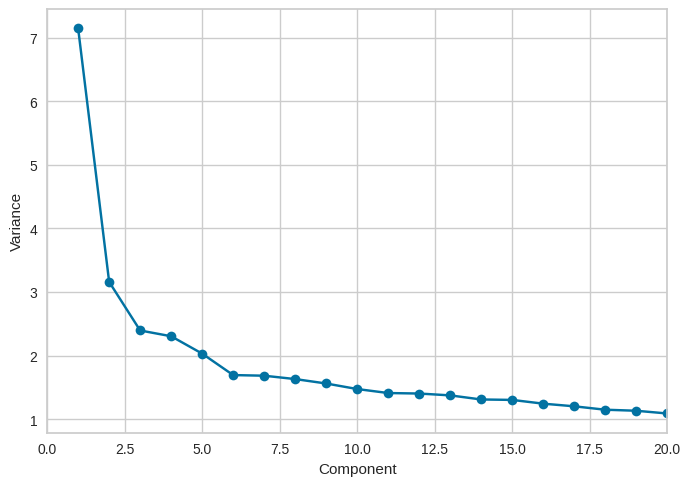

In [ ]:
# scree plot - shows successive proportion of additional variance that each component adds
import matplotlib.pyplot as plt
plt.plot(1+np.arange(len(df_pca.get_factor_variance()[0])),
         df_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')
plt.xlim(0, 20)

In [ ]:
#Step 3: PCA - Varimax Rotation
df_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=9,
                                          rotation='varimax',
                                          method='principal').fit(df_sc)


In [ ]:
pd.set_option("display.max_rows", None)
get_loadings_communalities(df_pca_rotated)

,RC1,RC2,RC3,RC4,RC5,RC6,RC7,RC8,RC9,communalities
q1,0.103,0.140,-0.199,0.045,-0.176,-0.133,-0.274,0.136,0.206,0.257
q2,-0.229,0.055,-0.100,-0.405,-0.149,0.176,0.137,-0.306,0.213,0.441
q3,0.109,0.039,-0.049,-0.159,-0.098,-0.040,-0.032,0.191,-0.123,0.105
q4,-0.118,0.025,-0.034,-0.520,-0.067,-0.074,0.020,0.175,-0.015,0.328
q5,0.213,-0.007,-0.197,0.088,0.078,-0.113,-0.307,0.130,-0.081,0.228
q6,0.037,0.018,0.112,0.028,-0.016,-0.062,0.046,0.021,-0.323,0.126
q7,0.052,-0.089,-0.248,0.177,-0.055,-0.053,0.256,-0.060,0.096,0.188
q8,-0.056,-0.020,-0.072,-0.139,-0.123,0.040,0.560,0.027,-0.022,0.360
q9,-0.035,-0.073,0.005,-0.143,0.077,0.030,0.107,0.519,0.031,0.316
q10,0.019,-0.030,-0.055,0.100,-0.028,0.008,-0.052,0.601,-0.017,0.379


In [ ]:
def get_loadings_communalities_1(fa, threshold=0.6):
    loadings = pd.DataFrame(fa.loadings_, columns=[f'RC{i+1}' for i in range(fa.n_factors)])
    loadings.index = [f'q{i+1}' for i in range(fa.loadings_.shape[0])]

    communalities = pd.Series(fa.get_communalities(), index=loadings.index, name='communalities')

    result = pd.concat([loadings, communalities], axis=1)

    # Apply threshold to communalities
    result = result[result['communalities'] >= threshold]

    # Highlight values above threshold in factor columns
    for col in result.columns[:-1]:  # Exclude the 'communalities' column
        result[col] = result.apply(lambda row: row[col] if (row[col] >= threshold and row['communalities'] >= threshold) else '', axis=1)

    # Sort by q numbers
    result = result.sort_index()

    return result

In [ ]:
# Use the function
pd.set_option("display.max_rows", None)
result = get_loadings_communalities_1(df_pca_rotated, threshold=0.4)

result.head(70)

,RC1,RC2,RC3,RC4,RC5,RC6,RC7,RC8,RC9,communalities
q12,,,,,,,,,,0.588888
q13,,,,,,,,,,0.501741
q14,,,,,,,,,,0.438245
q2,,,,,,,,,,0.440746
q23,0.635708,,,,,,,,,0.473962
q24,0.708311,,,,,,,,,0.527459
q25,0.721187,,,,,,,,,0.545153
q30,,,,,0.4661,,,,,0.450155
q31,,,,,0.63166,,,,,0.500911
q32,,,,,0.507403,,,,,0.401469


In [ ]:
df_X_scores = df_pca_rotated.transform(df)
pd.DataFrame(df_X_scores,columns=['RC1','RC2', 'RC5', 'RC6']).head(5)

ValueError: Shape of passed values is (600, 9), indices imply (600, 4)